### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,silhouette_score,calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from scipy.cluster import hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
crime_data=pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Data Understanding

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

### Data Preprocessing

In [6]:
crime_data.rename(columns={'Unnamed: 0':'States'},inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
X=crime_data.drop('States',axis=1)

In [8]:
ss=StandardScaler()
scaled_X_array=ss.fit_transform(X)
scaled_X_df=pd.DataFrame(scaled_X_array,columns=crime_data.columns[1:])
scaled_X_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


### Using Hierarchical Method

In [9]:
hierarchy=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label_hierarchy=hierarchy.fit_predict(scaled_X_df)

In [10]:
crime_data['label_hierarchy']=label_hierarchy
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [11]:
crime_data['label_hierarchy'].nunique()

3

In [12]:
crime_data[crime_data['label_hierarchy']==0]

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [13]:
crime_data[crime_data['label_hierarchy']==1]

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
24,Missouri,9.0,178,70,28.2,1
29,New Jersey,7.4,159,89,18.8,1


In [14]:
crime_data[crime_data['label_hierarchy']==2]

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


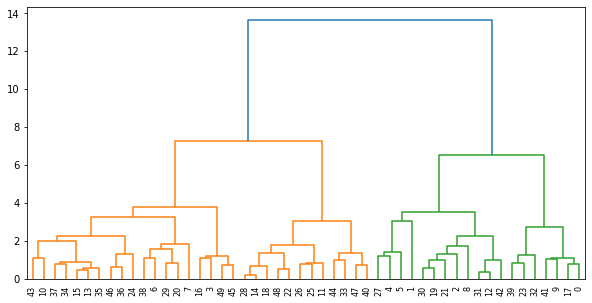

In [15]:
plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(y=scaled_X_df, method='ward', metric='euclidean'),
               orientation='top',show_leaf_counts=True,distance_sort='descending')
plt.show()

In [16]:
mean_hierarchy=crime_data.iloc[:,1:].groupby('label_hierarchy').agg('mean').round(2)
mean_hierarchy

,Murder,Assault,UrbanPop,Rape
label_hierarchy,,,,
0,12.33,259.32,68.32,29.22
1,6.21,142.05,71.26,19.18
2,3.09,76.00,52.08,11.83


In [17]:
grouping=crime_data.groupby('label_hierarchy')['States'].apply(lambda x: tuple(x))
grouping

label_hierarchy
0    (Alabama, Alaska, Arizona, California, Colorad...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
Name: States, dtype: object

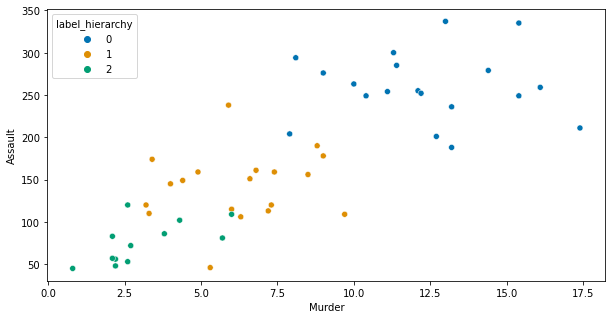

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Murder',y='Assault',hue='label_hierarchy',data=crime_data,palette='colorblind')
plt.show()

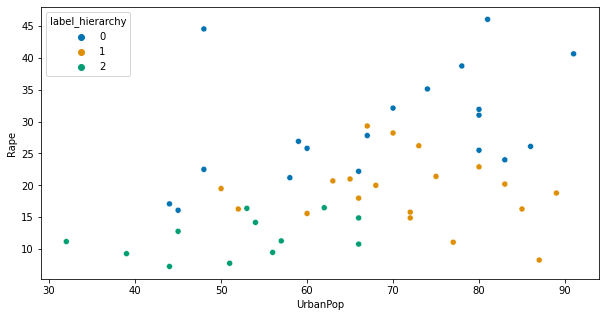

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='UrbanPop',y='Rape',hue='label_hierarchy',data=crime_data,palette='colorblind')
plt.show()

### Inference :

* Created 3 clusters to segment States.
* From Scatter Plot we could see that Different states categorized into 3 different colours

### Using KMeans Method

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=600,random_state=12,algorithm='auto')
label_kmeans=kmeans.fit_predict(scaled_X_df)

In [21]:
crime_data['label_kmeans']=label_kmeans
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy,label_kmeans
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,1


In [22]:
crime_data['label_kmeans'].nunique()

3

In [23]:
crime_data[crime_data['label_kmeans']==0]

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy,label_kmeans
3,Arkansas,8.8,190,50,19.5,1,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
13,Indiana,7.2,113,65,21.0,1,0
15,Kansas,6.0,115,66,18.0,1,0
20,Massachusetts,4.4,149,85,16.3,1,0
26,Nebraska,4.3,102,62,16.5,2,0
29,New Jersey,7.4,159,89,18.8,1,0
34,Ohio,7.3,120,75,21.4,1,0


In [24]:
crime_data[crime_data['label_kmeans']==1]

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy,label_kmeans
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,1
12,Illinois,10.4,249,83,24.0,0,1
17,Louisiana,15.4,249,66,22.2,0,1
19,Maryland,11.3,300,67,27.8,0,1


In [25]:
crime_data[crime_data['label_kmeans']==2]

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy,label_kmeans
11,Idaho,2.6,120,54,14.2,2,2
14,Iowa,2.2,56,57,11.3,2,2
16,Kentucky,9.7,109,52,16.3,1,2
18,Maine,2.1,83,51,7.8,2,2
22,Minnesota,2.7,72,66,14.9,2,2
25,Montana,6.0,109,53,16.4,2,2
28,New Hampshire,2.1,57,56,9.5,2,2
33,North Dakota,0.8,45,44,7.3,2,2
40,South Dakota,3.8,86,45,12.8,2,2
44,Vermont,2.2,48,32,11.2,2,2


In [26]:
mean_kmeans=crime_data.iloc[:,1:].groupby('label_kmeans').agg('mean').round(2)
mean_kmeans

,Murder,Assault,UrbanPop,Rape,label_hierarchy
label_kmeans,,,,,
0,5.76,139.67,71.89,18.69,1.06
1,12.16,255.25,68.40,29.16,0.05
2,3.54,76.58,51.25,11.82,1.92


In [27]:
grouping=crime_data.groupby('label_kmeans')['States'].apply(lambda x: tuple(x))
grouping

label_kmeans
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Alabama, Alaska, Arizona, California, Colorad...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
Name: States, dtype: object

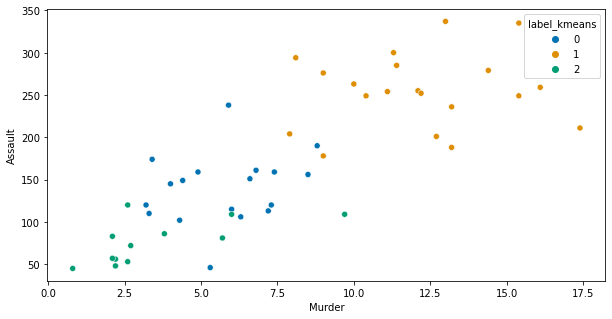

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Murder',y='Assault',hue='label_kmeans',data=crime_data,palette='colorblind')
plt.show()

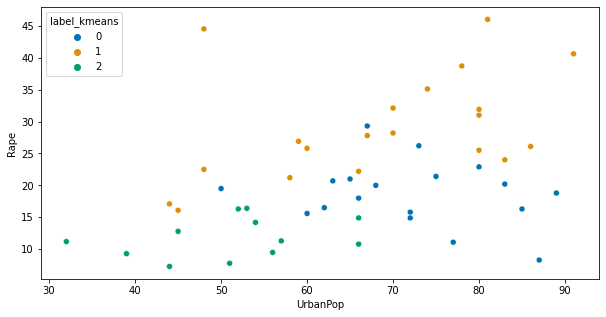

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='UrbanPop',y='Rape',hue='label_kmeans',data=crime_data,palette='colorblind')
plt.show()

### Inference :

* Created 3 clusters to segment States.
* From Scatter Plot we could see that Different states categorized into 3 different colours

### Using DBScan Method

In [30]:
dbscan=DBSCAN(eps=0.8,min_samples=3,metric='euclidean')
label_dbscan=dbscan.fit_predict(scaled_X_df)

In [31]:
crime_data['label_dbscan']=label_dbscan
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,label_hierarchy,label_kmeans,label_dbscan
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,0,1,-1


In [32]:
crime_data['label_dbscan'].nunique()

4

In [33]:
mean_dbscan=crime_data.iloc[:,1:].groupby('label_dbscan').agg('mean')
mean_dbscan

,Murder,Assault,UrbanPop,Rape,label_hierarchy,label_kmeans
label_dbscan,,,,,,
-1,9.957692,211.076923,68.615385,24.069231,0.423077,0.807692
0,4.644444,99.222222,59.000000,14.577778,1.611111,1.111111
1,11.600000,280.000000,70.333333,31.666667,0.000000,1.000000
2,4.033333,141.333333,73.333333,26.133333,1.000000,0.000000


In [34]:
grouping=crime_data.groupby('label_dbscan')['States'].apply(lambda x: tuple(x))
grouping

label_dbscan
-1    (Alabama, Alaska, Arizona, Arkansas, Californi...
 0    (Idaho, Indiana, Iowa, Kansas, Maine, Minnesot...
 1                     (Maryland, Michigan, New Mexico)
 2                           (Oregon, Utah, Washington)
Name: States, dtype: object

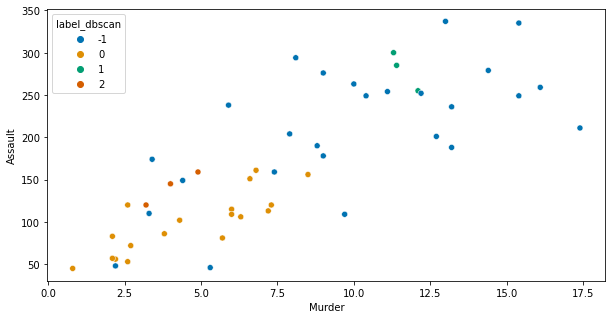

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Murder',y='Assault',hue='label_dbscan',data=crime_data,palette='colorblind')
plt.show()

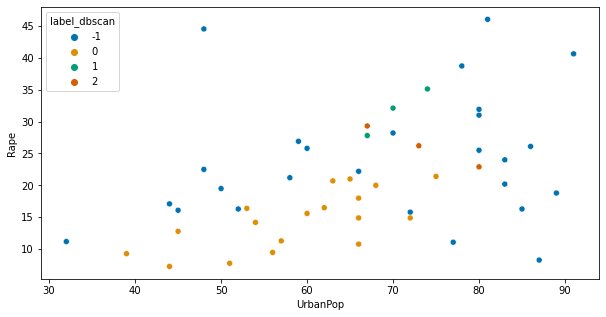

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='UrbanPop',y='Rape',hue='label_dbscan',data=crime_data,palette='colorblind')
plt.show()

### Inference :

* Created 4 clusters to segment States.
* From Scatter Plot we could see that Different states categorized into 4 different colours

### Find Optimum number of Clusters

#### Elbow Method - by finding wcss/inertia

In [37]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    clusters=kmeans.fit_predict(scaled_X_df)
    wcss.append(kmeans.inertia_)
print('clusters are :',np.unique(clusters))
list(enumerate(wcss))

clusters are : [0 1 2 3 4 5 6 7 8 9]


[(0, 200.0),
 (1, 104.96163315756871),
 (2, 79.95548163171664),
 (3, 57.55425863091104),
 (4, 50.05119672966492),
 (5, 43.74655557175968),
 (6, 39.041292494974435),
 (7, 36.51038004793846),
 (8, 31.074730757717177),
 (9, 28.411528116083336)]

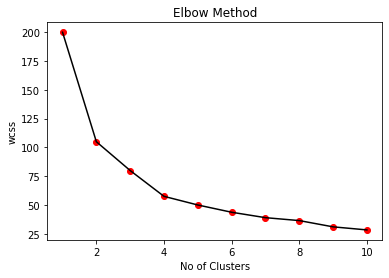

In [38]:
plt.plot(range(1,11),wcss,color='black')
plt.scatter(range(1,11),wcss,color='red')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

##### From Elbow method, we can assume that Optimum number of clusters are 2

### silhouette Score

In [39]:
inertia=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=True)
    y=kmeans.fit_predict(scaled_X_df)
    inertia.append(silhouette_score(scaled_X_df,y))
print('clusters are :',np.unique(y))
list(enumerate(inertia))

clusters are : [0 1 2 3 4 5 6 7 8]


[(0, 0.4084890326217641),
 (1, 0.30813622648945616),
 (2, 0.33968891433344395),
 (3, 0.2968626678243933),
 (4, 0.2797372888992387),
 (5, 0.24929596022381695),
 (6, 0.2512903087656266),
 (7, 0.2539733356759759)]

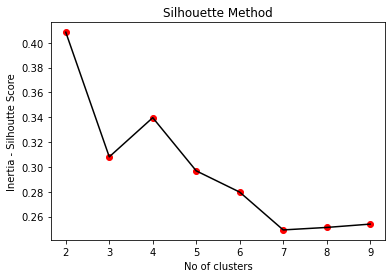

In [40]:
plt.plot(range(2,10),inertia,color="black")
plt.scatter(range(2,10),inertia,color="red")
plt.title('Silhouette Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia - Silhoutte Score')
plt.show()

##### From Silhouette Score method, we can assume that Optimum number of clusters are 3

#### calinski harabasz score

In [41]:
inertia=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=True)
    y=kmeans.fit_predict(scaled_X_df)
    inertia.append(calinski_harabasz_score(scaled_X_df,y))
print('clusters are :',np.unique(y))
list(enumerate(inertia))

clusters are : [0 1 2 3 4 5 6 7 8]


[(0, 43.46199150301377),
 (1, 35.18713488296232),
 (2, 37.94972059900646),
 (3, 33.77773452281307),
 (4, 30.107022985564324),
 (5, 27.792973258281236),
 (6, 27.735374589293528),
 (7, 26.266687450083776)]

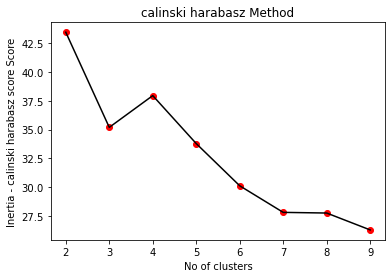

In [42]:
plt.plot(range(2,10),inertia,color="black")
plt.scatter(range(2,10),inertia,color="red")
plt.title('calinski harabasz Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia - calinski harabasz score Score')
plt.show()

##### From calinski harabasz method, we can assume that Optimum number of clusters are 3

### End !!!